# CV4Ecology Student

**Antón Álvarez** (@antonalvarezbc)
*WWF Spain*

I am Antón Álvarez, a conservation biologist, the technical coordinator of Iberian lynx projects at WWF Spain. Within conservation biology, I have always tried to be pragmatic. This has led me to work on several endangered species, such as the Iberian lynx, the giant otter and the pink river dolphin, among others, and always with a clear objective: to try to apply statistical and technological development to the study and conservation of the biodiversity. I am aware that interdisciplinary collaborations are essential to reach solutions that have a real impact. I believe that thanks to CV4ecology, I will be able to collaborate much more in the near future.

**Project**:

The Iberian lynx is the most endangered feline and one of the least genetically diverse species. Therefore, it is crucial to identify when a lynx ID from one subpopulation moves to another, enabling gene flow between subpopulations. Thanks to conservation efforts, the lynx population has grown from around 100 individuals in 2002 to 1365, and its distribution has increased in the last few years. As a result, the re-ID work (individual identification of each lynx from a picture) has grown exponentially. My project will focus on updating the re-ID algorithms to state-of-the-art. Ideally, this development will impact Iberian lynx conservation, as they can be implemented in platforms such as Wildbook and used to contribute to censuses or detect movements between subpopulations.

**Reference work**: 

I would like to have as a reference the work carried out by the collaborators of the [WBIA plugin PIE2 repository](https://github.com/WildMeOrg/wbia-plugin-pie-v2):

* [Olga Moskvyak](https://github.com/olgamoskvyak)
* [Drew Blount](https://github.com/drewblount)
* [Jason Parham](https://github.com/bluemellophone)  (our CV4Ecology tutor)

And theirs papper:

*   [Robust Re-identification of Manta Rays from
Natural Markings by Learning Pose Invariant
Embeddings](https://arxiv.org/pdf/1902.10847.pdf)
*   [Comparison of Two Individual Identification Algorithms for Snow Leopards after Automated Detection 
](https://www.biorxiv.org/content/10.1101/2022.01.20.477059v1.full.pdf)

From this reason I have changed to use the COCO API addapted from the [WBIA plugin PIE2 repository](https://github.com/WildMeOrg/wbia-plugin-pie-v2) instead of the CV4Ecology_Assignment0 approach.

# Load dataset



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Mount the dataset

In [ ]:
!unzip gdrive/MyDrive/A_Fuegos/Dataset_CV4ecology/iberianlynxcv4ecology_v1

Archive:  gdrive/MyDrive/A_Fuegos/Dataset_CV4ecology/iberianlynxcv4ecology_v1.zip
 extracting: annotations/instances_default.json  
 extracting: images/Serrin (3).png   
 extracting: images/Proa (2).JPG     
 extracting: images/RiMiera (8).JPG  
 extracting: images/Bardenas (25).jpg  
 extracting: images/Betis (27).jpg   
 extracting: images/Brinco (26).jpg  
 extracting: images/Kiki (24).JPG    
 extracting: images/Albo (7).JPG     
 extracting: images/Bardo (34).jpg   
 extracting: images/Orza (2).JPG     
 extracting: images/Nebuloso (13).jpg  
 extracting: images/Lila (6).jpg     
 extracting: images/Bardo (52).JPG   
 extracting: images/Brinco (58).jpg  
 extracting: images/Quistion (1).JPG  
 extracting: images/Iñalbali (6).jpg  
 extracting: images/Skua (3).png     
 extracting: images/Popa (3).JPG     
 extracting: images/Brinco (60).jpg  
 extracting: images/NectarMt (9).JPG  
 extracting: images/Lucero (10).JPG  
 extracting: images/Ofidio (6).JPG   
 extracting: images/Necta

TODO: use Microsoft Azure or Google Cloud instead Google Drive

# Analysis of the dataset: Iberian lynx


First import useful packages

In [ ]:
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import imageio as io
import os
import json

In [ ]:
annFile = 'gdrive/MyDrive/A_Fuegos/Dataset_CV4ecology/lynxparinus.coco/annotations/instances_default.json'
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


Display COCO categories and supercategories

In [ ]:
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories: \n{} \U0001f605...just one animal category (\U0001f406 Iberian lynx) in the dataset)\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)), 
 "          (empty) TODO: need to be fixed...the supercategoty need to be Animal")

COCO categories: 
lynxpardinus 😅...just one animal category (🐆 Iberian lynx) in the dataset)

COCO supercategories: 
           (empty) TODO: need to be fixed...the supercategoty need to be Animal


## Annotations

Load and display annotations

### Annotations descriptions

[{'area': 1785606.1596000006,
  'attributes': {'Subpopulation': 'Montes',
   'cage': False,
   'clipped': False,
   'color': True,
   'context': 'camtrap',
   'identifiable': 'media',
   'individual_id': 'Occidente',
   'lynxclipped': 'null',
   'mota': 'intermedia',
   'occluded': False,
   'oclusion': False,
   'radiocollar': True,
   'rareposition': True,
   'rotation': 0.0,
   'viewpoint': 'detrasizquierda'},
  'bbox': [1463.61, 874.12, 1373.67, 1299.88],
  'category_id': 1,
  'id': 600,
  'image_id': 667,
  'iscrowd': 0,
  'segmentation': []}]

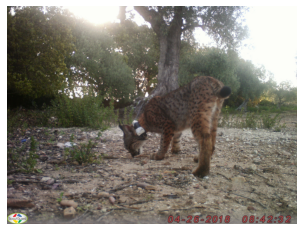

In [ ]:
catIds = coco.getCatIds(catNms=nms);
imgIds = coco.getImgIds(catIds=catIds);

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread('%s/images/%s'%("/content", img['file_name']))
 
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
# coco.showAnns(anns) TO REVIEW
anns

*   'individual_id': 'Which individual (name) Iberian lynx is it?
*   'Subpopulation': Name of the lynx subpopulation, closely related to the background
*   'viewpoint': What is the lynx's viewpoint
*   'identifiable': How well is the individual identified?
*   'rareposition': Does the lynx have an odd position (even if True it can always be identified)?
*   'mota': What kind of coat pattern do the lynx have?
*   'lynxclipped': Does the lynx have any part of its body cut off in the image (e.g. "head")?
*   'context': Is it a hand-held photo, from CT, or a veterinary check-up?
*   'clipped': Is the image already pre-cropped?
*   'oclusion': Is the lynx occluded somewhere, for example by a branch (and you can see the body of the lynx on one side and another on the other side of the branch)?,
*   'radiocollar': Does the lynx have a radiocollar in the image?
*   'cage': There is a box in the background? (Hootspotter often uses them to make mistakes in reid) 

#### Number of annotations

In [ ]:
print('Following Blount et al. (2022), I reduce the number of annotations to: {}'.format(len(coco.getAnnIds(imgIds))))

Following Blount et al. (2022), I reduce the number of annotations to: 1495


I can "easily" increase the number, but I think it's a number of annotations to play with in summer school.
I will have several ways to increase the number of annotations depending on the requirements.

## Analyse viewpoints

Collect viewpoint annotation, select unique viewpoints and compute how many annotations per viewpoint.

In [ ]:
all_anns = coco.loadAnns(coco.getAnnIds())
ids_anns = np.array([ann['id'] for ann in all_anns])
views_anns = np.array([ann['attributes']['viewpoint'] for ann in all_anns])
views, views_counts = np.unique(views_anns, return_counts=True)
views, views_counts


(array(['derecha', 'detrasderecha', 'detrasizquierda', 'frente',
        'frenteizquierda', 'fretederecha', 'izquierda'], dtype='<U15'),
 array([720,  36,  44,   1,  25,  31, 638]))

Plot bar chart:

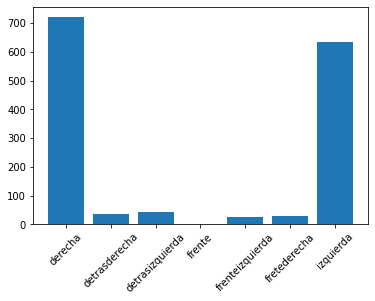

In [ ]:
plt.bar(views, views_counts)
plt.xticks(rotation=45)
plt.show()


*   derecha = Right in Spanish
*   izquierda = Left in Spanish




## Analyse IDs


In [ ]:
names_anns = np.array([ann['attributes']['individual_id'] for ann in all_anns])
names, names_count = np.unique(names_anns, return_counts=True)
print('Found {} unique IDs'.format(len(names)))

Found 187 unique IDs


In [ ]:
print(dict(zip(names, names_count)))

{'': 20, 'Albo': 7, 'Alfonso': 12, 'Ambroz': 17, 'Ana': 5, 'Arce': 34, 'Arista': 7, 'Avispa': 9, 'Azuel': 3, 'Babel': 14, 'Barbi': 3, 'Bardenas': 25, 'Bardo': 50, 'Bayon': 23, 'Betis': 47, 'Bolina': 9, 'Bornizo': 18, 'Brinco': 60, 'Imaestre': 3, 'Indie': 6, 'Inri': 5, 'Intenso': 8, 'Ipa': 8, 'Ipizorra': 8, 'Iñalbali': 8, 'Kahn': 6, 'Karma': 8, 'Kea': 8, 'Kendo': 9, 'Kentaro': 7, 'Keres': 7, 'Kiki': 17, 'Kiowa': 11, 'Kuna': 12, 'Lava': 10, 'Lila': 8, 'Llerena': 8, 'Lucero': 10, 'Luna': 8, 'Malabar': 10, 'Malvasia': 12, 'Marches': 7, 'Mazapan': 10, 'Medellin': 8, 'Miarabel': 6, 'Miera': 7, 'Minerva': 9, 'Morgana': 5, 'Moruno': 2, 'Mosquito': 7, 'Mosto': 9, 'Mural': 10, 'Naia': 15, 'Naipe': 6, 'Nana': 3, 'Narnia': 3, 'Nativo': 7, 'Navaja': 6, 'Navapilas': 7, 'Navillas': 7, 'Nebuloso': 11, 'NectarMT': 15, 'Nectarina': 9, 'Negral': 7, 'Negro': 16, 'Nenufar': 8, 'NeoMt': 8, 'Nerpio': 10, 'Nervio': 10, 'Nevia': 11, 'Ninfa': 12, 'Nival': 11, 'Noctua': 6, 'Nubara': 9, 'Occidente': 5, 'Ofidio': 

In [ ]:
for num in range(1, 15):
    print('{} names have {} image'.format((names_count == num).sum(), num))

0 names have 1 image
5 names have 2 image
34 names have 3 image
13 names have 4 image
8 names have 5 image
27 names have 6 image
25 names have 7 image
22 names have 8 image
15 names have 9 image
12 names have 10 image
4 names have 11 image
6 names have 12 image
0 names have 13 image
2 names have 14 image


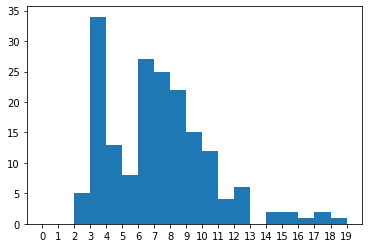

In [ ]:
bins = list(range(20))
plt.hist(names_count, bins=bins)
plt.xticks(bins)
plt.show()

The effect of forcing at least min3/max10 per ID and viewpoint.

In [ ]:
dnames_countdict = dict(zip(names, names_count))
print('The ID with more images is {} with {} images'.format(max(dnames_countdict, key=dnames_countdict.get),max(names_count) ))

The ID with more images is Brinco with 60 images


*Brinco is a historical ID for the historical Andujar population*

## Analyse combination ID + viewpoint

Create new identity labels by lynxID name and viewpoint.

In [ ]:
name_view_anns = np.array(['{}_{}'.format(n, v) for n, v in zip(names_anns, views_anns)])
name_views, name_views_count = np.unique(name_view_anns, return_counts=True)
print('Found {} unique name_views'.format(len(name_views)))

Found 435 unique name_views


In [ ]:
anns['attributes']

TypeError: ignored

Number of ray: 120 
630 

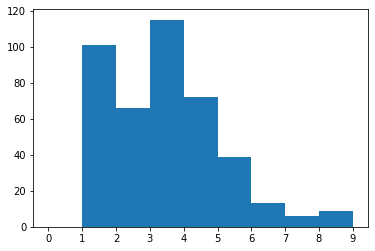

In [ ]:
bins = list(range(10))
plt.hist(name_views_count, bins=bins)
plt.xticks(bins)
plt.show()

The large number of 1's is due to the viewpoints
front left, front right, back left, back right...which will add up to 2 and thus reach the Min-3 necessary for training machine learning algorithms like PIE.
At other times, min-3 will not be reached, but may be useful for the test phase.

In [ ]:
for num in range(1, 10):
    print('{} names (IDs+viewpoint) have {} image(s)'.format((name_views_count == num).sum(), num))

101 names (IDs+viewpoint) have 1 image(s)
66 names (IDs+viewpoint) have 2 image(s)
115 names (IDs+viewpoint) have 3 image(s)
72 names (IDs+viewpoint) have 4 image(s)
39 names (IDs+viewpoint) have 5 image(s)
13 names (IDs+viewpoint) have 6 image(s)
6 names (IDs+viewpoint) have 7 image(s)
6 names (IDs+viewpoint) have 8 image(s)
3 names (IDs+viewpoint) have 9 image(s)


Get an array of filenames and bounding boxes for display purposes:



In [ ]:
filenames = np.array([coco.loadImgs(ann['image_id'])[0]['file_name'] for ann in all_anns])
filenames = np.array(['%s/images/%s'%("/content",f) for f in filenames])

bboxes = np.array([ann['bbox'] for ann in all_anns])

I add the plot_names funtion and modified it to my  use

In [ ]:
#Modified from https://github.com/olgamoskvyak/wbia-plugin-pie-v2/blob/develop/wbia_pie_v2/notebooks-data-analysis/utils.py

import math
def plot_names(
    names,
    filenames,
    bboxes,
    display_labels,
    crop=False,
    max_display=16,
    ncols=4,
    ratio=(4, 4),
    name=None,
):
    if name is None:
        # Select random name
        name_idx = np.random.choice(len(names), size=1)[0]
        name = names[name_idx]

    assert name in names_anns##Change for AAB use

    num_samples = (names_anns == name).sum()##Change for AAB use
    print('Found {} annots for name {}'.format(num_samples, name))

    # Get all samples for selected name
    sel_filenames = filenames[names_anns == name][:max_display] ##Change for AAB use
    sel_bboxes = bboxes[names_anns == name][:max_display] ##Change for AAB use
    sel_display_labels = display_labels[names_anns == name][:max_display] ##Change for AAB use

    nrows = math.ceil(min(num_samples, max_display) / ncols)
    fig, ax = plt.subplots(
        nrows=nrows, ncols=ncols, figsize=(ratio[0] * ncols, ratio[1] * nrows)
    )

    if nrows == 1:
        for c in range(ncols):
            index = c
            if index < num_samples:
                image = io.imread(sel_filenames[index])
                x, y, w, h = sel_bboxes[index]
                if crop:
                    image = image[y : y + h, x : x + w]
                ax[c].imshow(image)
                if not crop:
                    ax[c].plot([x, x + w, x + w, x, x], [y, y, y + h, y + h, y], '-r')
                ax[c].set_title('{}'.format(sel_display_labels[index]))
            ax[c].axis('off')
    else:
        for r in range(nrows):
            for c in range(ncols):
                index = r * ncols + c
                if index < num_samples:
                    image = io.imread(sel_filenames[index])
                    x, y, w, h = sel_bboxes[index]
                    if crop:
                        image = image[y : y + h, x : x + w]
                    ax[r, c].imshow(image)
                    if not crop:
                        ax[r, c].plot(
                            [x, x + w, x + w, x, x], [y, y, y + h, y + h, y], '-r'
                        )
                    ax[r, c].set_title('{}'.format(sel_display_labels[index]))
                ax[r, c].axis('off')

    plt.tight_layout()


Found 34 annots for name Arce


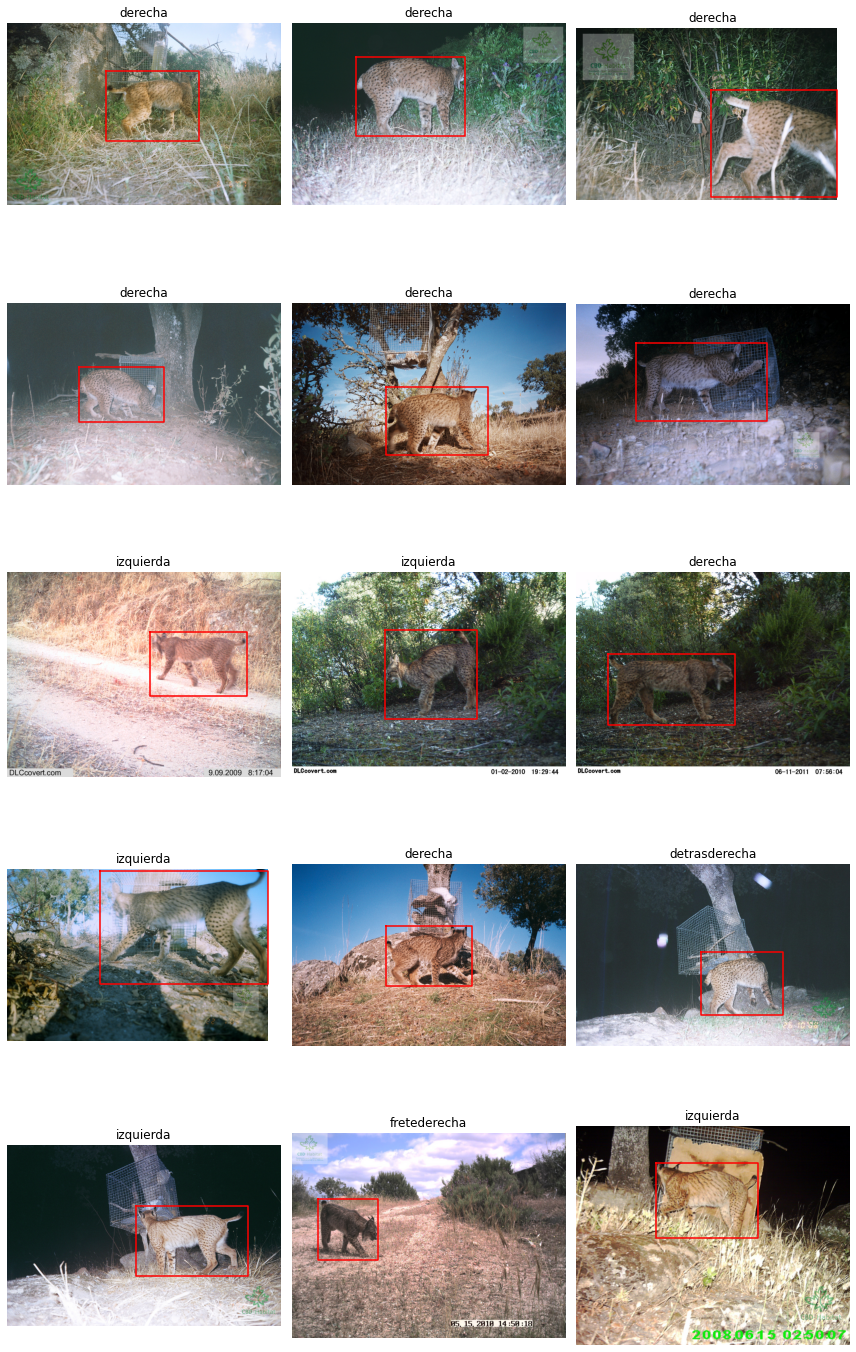

In [ ]:
plot_names(names_anns, filenames, bboxes, views_anns, crop=False, max_display=15, ncols=3, ratio=(4,4))

# ID types in the dataset (WIP)

 [Blount et al.(2022)](https://colab.research.google.com/drive/1wCIVodh_GbwoTdV7Rl4uw51nk5t9d7D3#scrollTo=DLfd2Df3Qqky)
with a snow leopard with 126 IDs and 829 annotationd found a PIE weaknees, the background matching. Although likely not fully resolved, by applying background subtraction and left-right mirroring methods. This weakness has been taken into consideration when curating the dataset.


## *IDs with heterogenius imagery*

One of the things I have tried is to have IDs with a lot of heterogeneity in the images. 

In [ ]:
context_anns = np.array([ann['attributes']['context'] for ann in all_anns])
context, context_counts = np.unique(context_anns, return_counts=True)

Found 10 annots for name Nerpio


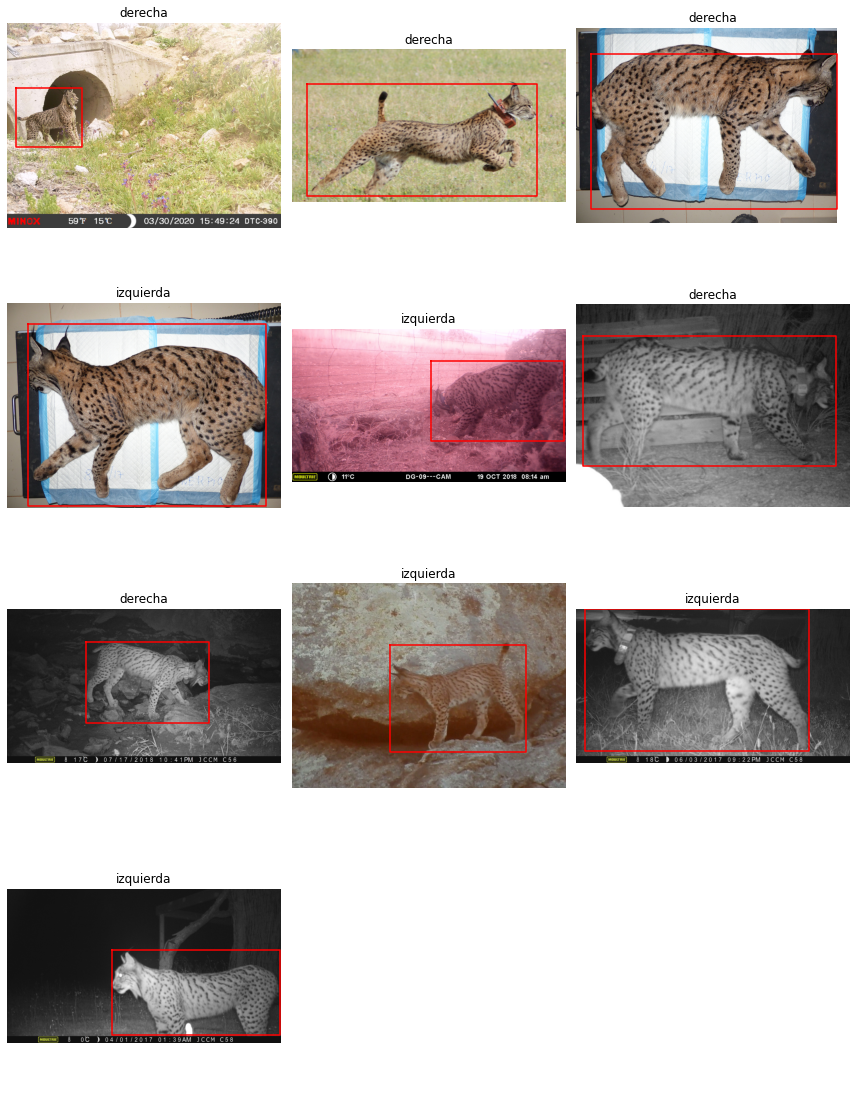

In [ ]:
plot_names(names,filenames, bboxes, views_anns, crop=False, max_display=15, ncols=3, ratio=(4,4), name='Nerpio')

I will give the example of Nerpio. It has images in black and white and in colour, from photo-trapping, manuals, or in the veterinary check-ups, with collar and without collar, adult and puppy. And balance with 5 images per viewpoint.

## IDs with old camera trap heterogenius imaginary



I have rescued images from near 20 years ago. I have try to have only one names (IDs+viewpoint) per location (unfortunately many locations look alike).

Found 3 annots for name Azuel


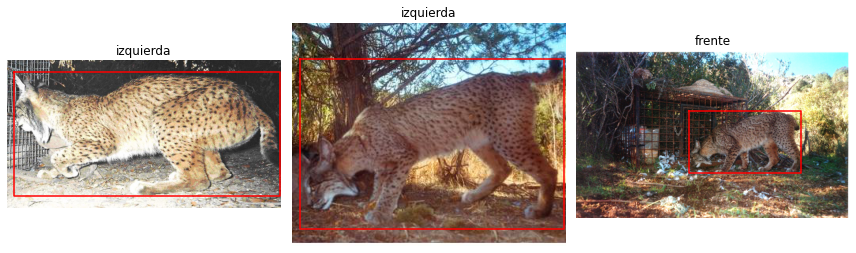

In [ ]:
plot_names(names,filenames, bboxes, views_anns, crop=False, max_display=61, ncols=3, ratio=(4,4), name='Azuel')